In [9]:
import random
from sklearn.cluster import KMeans
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

# k-Means on a randomly generated dataset

In [10]:
np.random.seed(0)

In [11]:
X, Y = make_blobs(n_samples=5000, centers = [[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

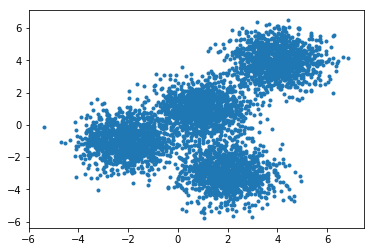

In [12]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [13]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [14]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [16]:
k_means_centers = k_means.cluster_centers_
k_means_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

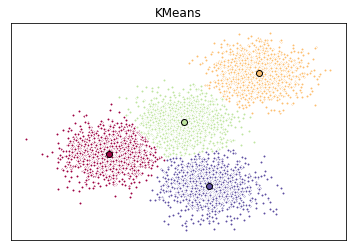

In [17]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels)))) 

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    
    my_members = (k_means_labels == k)
        
    cluster_center = k_means_centers[k]
    
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

# Customer Segmentation with K-Means

#### Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics

In [18]:
import pandas as pd
import numpy as np

In [19]:
cust_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv')
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [20]:
cust_df = cust_df.drop(['Address'], axis=1)
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [46]:
from sklearn.preprocessing import StandardScaler
X = cust_df.values[:,1:]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
X

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.52379654,
        -0.57652509, -0.5485468 ],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.52379654,
         0.39138677,  1.8799156 ],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.90913822,
         1.59755385, -0.5485468 ],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.90913822,
         3.45892281, -0.5485468 ],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.52379654,
        -1.08281745, -0.5485468 ],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.52379654,
        -0.2340332 ,  1.8799156 ]])

In [47]:
clusterNum = 3
kmeans = KMeans(init = 'k-means++', n_clusters = clusterNum, n_init = 12)
kmeans.fit(X)
labels = kmeans.labels_
print(labels)

[0 1 2 0 1 1 0 1 0 1 1 0 0 0 2 0 0 0 1 0 0 0 2 1 1 1 0 0 1 0 1 0 2 0 0 0 2
 2 0 1 2 1 0 1 0 1 0 0 0 0 1 0 2 1 2 2 2 0 1 0 1 0 1 1 0 0 1 2 0 2 0 1 1 0
 0 0 0 0 1 0 1 2 1 0 0 0 0 0 2 2 1 0 2 2 0 0 0 0 2 0 2 1 1 2 2 1 0 0 0 1 0
 0 0 2 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 2 2 0 0 0 1 0 1 2
 0 0 0 0 2 0 1 0 1 1 2 2 0 0 1 0 0 0 0 0 0 0 1 0 0 2 0 2 0 0 2 1 2 0 0 1 2
 2 0 0 0 1 0 0 1 2 1 0 0 1 1 0 1 0 2 0 0 2 0 1 1 2 0 0 0 1 0 2 1 1 0 1 2 1
 0 0 0 0 1 0 0 2 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 2 0 2 0
 0 0 1 0 2 1 2 0 1 0 0 2 0 0 0 0 2 2 2 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 2 0 0
 2 0 2 1 1 1 0 0 2 1 0 2 2 0 0 0 0 0 0 0 0 2 0 2 1 0 1 0 0 0 2 2 1 0 1 1 2
 0 0 2 0 1 0 0 0 0 0 2 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 2 0 2 1 0 1 1 1 0
 2 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0 2 0 0 2 2
 0 1 0 0 1 0 2 2 0 1 2 0 0 0 1 0 0 1 0 0 2 0 0 0 0 2 0 1 0 0 0 1 0 0 0 0 1
 0 2 0 0 0 0 1 2 0 0 1 0 2 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 2 0 0 0 2 0
 2 1 0 0 0 0 1 2 2 0 1 0 

In [48]:
cust_df['clus_num'] = labels
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,clus_num
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [49]:
cust_df.groupby('clus_num').mean()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
clus_num,,,,,,,,,
0,434.608081,33.353535,1.569697,7.139394,32.080808,0.852507,1.895426,0.000000,8.629495
1,402.737113,42.231959,1.979381,16.103093,97.809278,3.413170,6.313325,0.162338,10.581959
2,424.925466,31.503106,1.819876,3.869565,29.931677,1.591000,2.819478,0.987500,14.418634


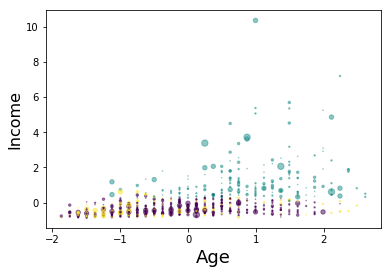

In [51]:
area = np.pi * ( X[:, 1]) ** 2
plt.scatter(X[:, 0], X[:, 3], s=area, c = labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()


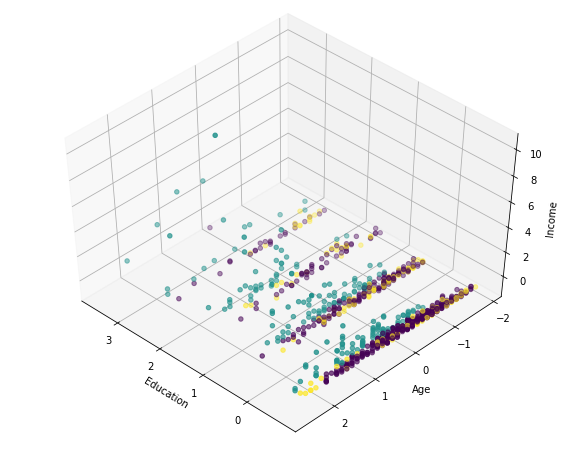

In [52]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))